In [13]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np

# 1. Linear Interpolation

Below we exhibit a function, lin_interp(x,y,X), which allows us to perform linear interpolation on a given set of data. We use the mathematical formulation of linear interpolation at a point in a for loop to perform several iterations on the given data set, allowing us to observe several points along the fitted curve. From this example we are able to infer that linear interpolation results in non-differentiability (possibily even discontinuity) at each connecting point. Overall, linear interpolation seems to be relatively simple while simultaneously still providing a sufficient method for allowing us to observe discrete changes between points, where continuity and smoothness are not a strict necessity. 

*Note: Like in previous examples, it is assumed that the $x$ data be entered in ascending order.*

In [57]:
def lin_interp(x, y, X):
        
        n = len(x)
    
        for i in range(n-1):
            Y = y[i] + ((y[i+1] - y[i])*(X-x[i]))/(x[i+1] - x[i])
        return Y


**Test case:**

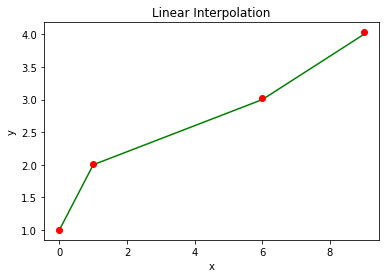

In [113]:
x = np.array([0, 1, 6, 9])
y = np.array([1, 2, 3, 4])
X = np.linspace(0,9.1,4) 

f = lin_interp(x,y,X)

plt.plot(x, y, 'g')
plt.plot(x,f,'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Interpolation")
plt.show()

# 2. Cubic Spline Interpolation

Below we exhibit an attempt at an original algorithm, not using any built in python functions. The attempted algorithm is as follows:

- find coefficients 
 
- put coefficients in matrix form

- solve matrix 

- use solution from matrix to formulate curve 


In [54]:
def cubic_spline(x,y,X):
    
    # get coefficients
    
    n = len(x)
    a = np.zeros(n+1)
    h = np.zeros(n)
    alpha = np.zeros(n)
    
    for i in range(len(y)):
        if isinstance(y[i],float) == 1:
            y = np.asfarray(y)
        else:
            y = np.array(y)
            
    for i in range(len(x)):
        if isinstance(x[i],float) == 1:
            x = np.asfarray(x)
        else:
            x = np.array(x)
            
    for i in range(n):
        a[i] = y[i]
        
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
    
    for i in range(1,n-1):
        alpha[i] = (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])

    b = np.zeros(n)
    d = np.zeros(n)
    c = np.zeros(n+1)
    l = np.zeros(n+1)
    m = np.zeros(n+1)
    z = np.zeros(n+1)
    
    l[0] = 1
    m[0] = 0
    z[0] = 0
    
    for i in range(1,n-1):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*m[i-1]
        m[i] = h[i]/l[i]
        z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]
        
    l[n] = 1
    z[n] = 0
    c[n] = 0
    
    for j in reversed(range(0,n-1)):
        c[j] = z[j] - m[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - (b[j]*(c[j+1] + 2*c[j]))/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    # create matrix
    
    Y = np.zeros([n,n])
    
    for j in range(0,n-1):
        Y[j] = a[j] + b[j]*(x-x[j]) + c[j]*(x-x[j])**2 + d[j]*(x-x[j])**3
    return Y


**Test case for cubic spline interpolation:**

In [55]:
X = np.linspace(0,1,101)
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

cubic_spline(x,y,X) # produces singular matrix

array([[ 1.        ,  0.82642591,  0.75412495,  0.69669842,  1.5809967 ,
         2.38088735,  5.90165263,  6.91291063],
       [ 1.00384048,  0.8187    ,  0.74582409,  0.47776787, -0.15120031,
        -0.61285541, -2.61570703, -3.19874765],
       [ 0.9575574 ,  0.80541699,  0.7408    ,  0.54698502,  0.41257237,
         0.3794905 ,  0.31338824,  0.29900185],
       [ 0.91489715,  0.76246382,  0.69693471,  0.4966    ,  0.3547555 ,
         0.32138072,  0.26794534,  0.259155  ],
       [ 0.91421024,  0.76379942,  0.69699166,  0.47972352,  0.3012    ,
         0.25211946,  0.16717581,  0.15459531],
       [ 0.8347074 ,  0.70356326,  0.64484167,  0.45155509,  0.29046387,
         0.2466    ,  0.17616155,  0.16740204],
       [ 2.464354  ,  1.87958644,  1.62964838,  0.87685307,  0.37575093,
         0.27254936,  0.1496    ,  0.13581449],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

**Test case for comparison to quintic spline interpolation:**

In [56]:
# use this data for the first test case in section 2 as well

x = np.array([1,2,3,4,5])
y = np.array([3,1,6,7,0])
X = np.linspace(1,5)

cubic_spline(x,y,X) # produces singular matrix

array([[  3.        ,   3.01785714,  15.14285714,  51.48214286,
        124.14285714],
       [  5.14285714,   1.        ,   8.96428571,  10.5       ,
        -12.92857143],
       [ -3.57142857,   2.44642857,   6.        ,   3.125     ,
        -10.14285714],
       [-65.53571429, -13.64285714,   7.07142857,   7.        ,
         -3.46428571],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

# 3. Higher Order (Quintic) Spline Interpolation Versus Cubic Spline Interpolation

In section we look at the differences and possible benefits between two use cases where quintic splin or cubic spline is used. Specifically, we write a function which uses python built in functions, then compare output to determine if there is a distinct advantage to using one method of interpolation over another in the provided examples. 

In [51]:
def spline_interp(x,y,X,option):
    
    if option == 'quintic':
        f = UnivariateSpline(x,y,k=4)
        x_new = X
        y_new = f(X)
        y_hat = f(x)
    
        plt.plot(x_new, y_new, 'bo')
        plt.plot(x, y_hat, 'g')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Quintic Spline Interpolation')
        plt.show()
        
    
    elif option == 'cubic':
        f = interp1d(x, y, kind = 'cubic')
        x_new = X
        y_new = f(X)
        y_hat = f(x)
    
        plt.plot(x_new, y_new, 'bo')
        plt.plot(x, y_hat, 'g')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Cubic Spline Interpolation')
        plt.show()

**Test case for comparison to cubic spline interpolation:**

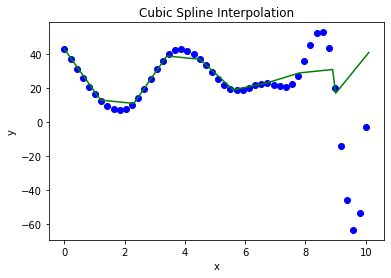

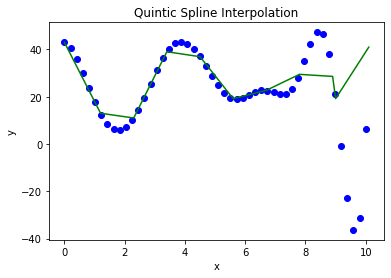

In [52]:
# uses same data for x and y as previous code chunk in section 1

spline_interp(x,y,X,'cubic')
spline_interp(x,y,X,'quintic')

**Test case for quintic spline:**

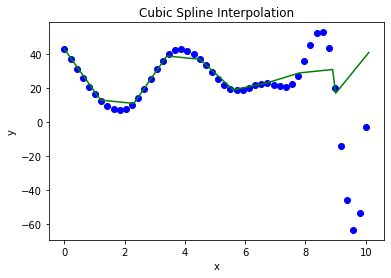

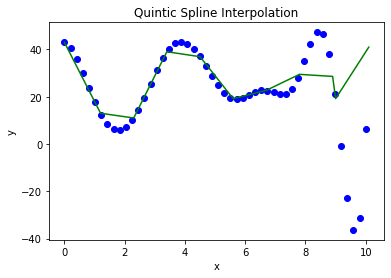

In [53]:
x = np.array([0, 1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0, 10.1])
y = np.array([43, 13, 11, 39, 37, 19, 23, 29, 31, 17, 41])
X = np.linspace(0,10)
spline_interp(x,y,X,'cubic')
spline_interp(x,y,X,'quintic')